In [1]:
import numpy
from matplotlib import pyplot
import sympy
%matplotlib inline

In [2]:
sympy.init_printing() #display with latex format

In [3]:
x = sympy.symbols('x')
x

In [4]:
5*x

In [5]:
x,nu,t = sympy.symbols('x nu t')

In [6]:
nu

In [9]:
phi = (sympy.exp(-(x-4*t)**2/(4*nu*(t+1)))+
       sympy.exp(-(x-4*t-2*numpy.pi)**2/(4*nu*(t+1)))) #to continue equation on next line, put between parenthesis or add a back slash after

In [11]:
phi

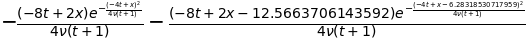

In [12]:
phiprime = phi.diff(x) #sympy derivation of phi
phiprime

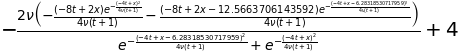

In [13]:
u = -2*nu*phiprime/phi+4
u

In [14]:
from sympy.utilities.lambdify import lambdify

In [15]:
u_lamb = lambdify((t,nu,x), u) #turn u equation into function, with t,nu,x input

In [16]:
type(u_lamb)

function

In [17]:
u_lamb(1,4,3)

In [20]:
#Set parameters
nx = 101
L = 2*numpy.pi
dx = L/(nx-1)
nu = 0.07
sigma = 0.1
dt = sigma*dx**2/nu
nt = 100

In [21]:
x = numpy.linspace(0.0,L,num = nx)

In [23]:
u0 = numpy.empty(nx)
for i in range(nx):
    u0[i] = u_lamb(0.0,nu,x[i])

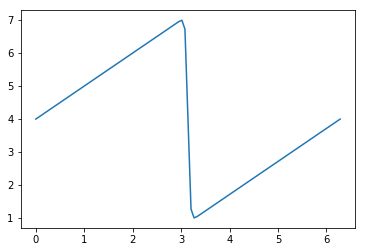

In [24]:
pyplot.plot(x,u0)

In [27]:
u_hist = [u0.copy()]
u = u0.copy()
for n in range(nt):
    un = u.copy()
    #update all interiors
    u[1:-1] = (un[1:-1] - un[1:-1]*dt/dx*(un[1:-1]-un[:-2]) 
               + nu*dt/dx**2*(un[:-2]-2*un[1:-1]+un[2:]))
    #boundary conditions
    u[0] = (un[0]-un[0]*dt/dx*(un[0]-un[-2])+
           nu*dt/dx**2*(un[-2]-2*un[0]+un[1]))
    u[-1] = u[0]
    #record
    u_hist.append(u.copy())